In this notebook, the construction of a binary output decision tree classifier a is carried out to predict the state of wakefulness or light sleep and that of deep sleep.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statistics as stats
from sklearn.model_selection import GridSearchCV
from random import sample
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error

In [2]:
Train_bin= pd.read_csv('Train_binary.csv')
Test_bin= pd.read_csv('Test_binary.csv')

X_train_bin=Train_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1) 
y_train_bin=Train_bin['Binary label']
X_test_bin=Test_bin.drop(['Multiple label', 'Binary label','ID'], axis = 1)
y_test_bin=Test_bin['Binary label']

In [3]:
clf= tree.DecisionTreeClassifier()
modelo_base=clf.fit(X_train_bin,y_train_bin)

In [4]:
clf

DecisionTreeClassifier()

In [5]:
tree.DecisionTreeClassifier()

DecisionTreeClassifier()

Search for parameters with cross-validation   
The search for parameters is performed. The parameters chosen are: maximum depth and minimum number of samples at each node, which constitute a part of the total of free parameters that can be configured in the decision trees and which allow intuitive control of the level of over ﬁ tting of the model, and also obtain graphs of Visually interpretable validation. For both parameters, a sweep of the possible values chosen is carried out to choose the one that maximizes accuracy.

In [6]:
max_depth=range(1,30)
min_samples_leaf=range(10,100)

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
tree_grid = GridSearchCV(clf, param_grid=param, scoring= 'accuracy',cv=5, n_jobs=-1)
tree_grid.fit(X_train_bin,y_train_bin)
best_parameters = tree_grid.best_params_

In [7]:
#Classifier with the best parameters
tree_clf=tree_grid.best_estimator_

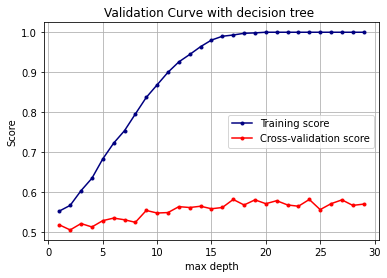

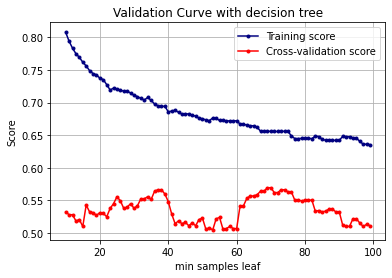

In [8]:
#max depth
train_scores1, test_scores1 = validation_curve(clf, X_train_bin, y_train_bin, param_name="max_depth", param_range=max_depth, cv=5, scoring="accuracy")
train_scores_mean1 = np.mean(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)
plt.title("Validation Curve with decision tree ")
plt.xlabel('max depth')
plt.ylabel("Score")

plt.plot(max_depth, train_scores_mean1, label="Training score",color="navy",marker='.')
plt.plot(max_depth, test_scores_mean1, label="Cross-validation score",color="red",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/max depth.png' )
plt.show()

#min samples leaf
train_scores2, test_scores2 = validation_curve(clf, X_train_bin, y_train_bin, param_name="min_samples_leaf", param_range=min_samples_leaf,cv=5, scoring="accuracy")
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)

plt.title("Validation Curve with decision tree")
plt.xlabel('min samples leaf')
plt.ylabel("Score")

plt.plot(min_samples_leaf, train_scores_mean2, label="Training score",color="navy",marker='.')
plt.plot(min_samples_leaf, test_scores_mean2, label="Cross-validation score",color="red",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/min samples leaf.png' )
plt.show()

<IPython.core.display.Javascript object>


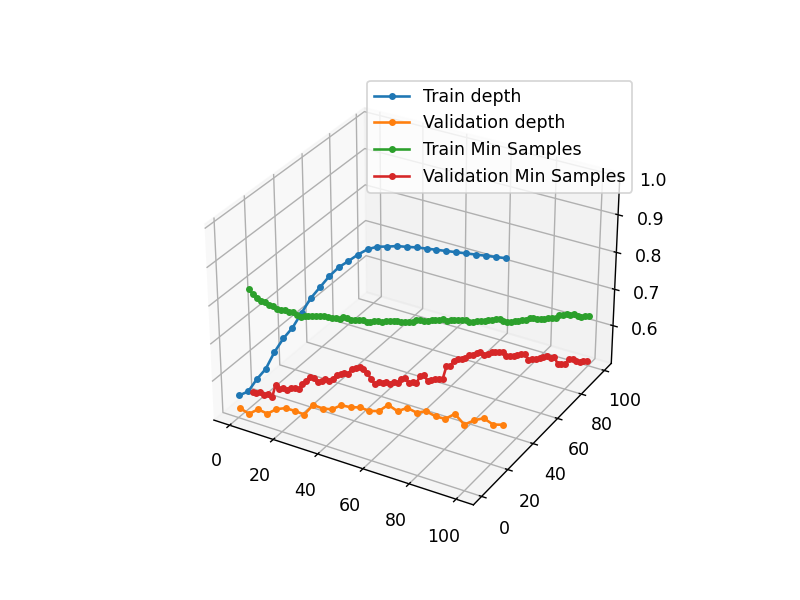

<ipython-input-9-1ceb4bf3aec0>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [9]:
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')
z1=np.linspace(0,100,29)
z2=np.linspace(0,100,90)



ax.plot(z1,max_depth,train_scores_mean1, marker='.', label='Train depth')
ax.plot(z1, max_depth,test_scores_mean1, marker='.', label='Validation depth')
ax.plot(z2,min_samples_leaf,train_scores_mean2, marker='.', label='Train Min Samples')
ax.plot(z2,min_samples_leaf,test_scores_mean2, marker='.', label='Validation Min Samples')

ax.legend()

plt.show()

In [19]:
print('The parameters selected by the GridSearch function are:',best_parameters)

The parameters selected by the GridSearch function are: {'max_depth': 7, 'min_samples_leaf': 69}


In [11]:
print("Base model hit rate:",modelo_base.score(X_test_bin,y_test_bin))
print("Model hit rate with the search for parameters:",tree_clf.score(X_test_bin,y_test_bin))
print('Improved: {:0.2f}%.'.format( 100 * (tree_clf.score(X_test_bin,y_test_bin) - modelo_base.score(X_test_bin,y_test_bin)) / modelo_base.score(X_test_bin,y_test_bin)))

Base model hit rate: 0.5291828793774319
Model hit rate with the search for parameters: 0.4980544747081712
Improved: -5.88%.


In [20]:
predict = tree_clf.predict(X_test_bin)
acc_test= tree_clf.score(X_test_bin, y_test_bin).round(4)
acc_train= tree_clf.score(X_train_bin, y_train_bin).round(4)
print('The accuracy for the decision tree model in the TEST set is:', acc_test,'\n')
print('The accuracy for the decision tree model in the TRAIN set is:', acc_train,'\n')

print("Confusion Matrix")
print(confusion_matrix(y_test_bin, predict),'\n')
print("================Classification Report=================")
print(classification_report(y_test_bin, predict))

The accuracy for the decision tree model in the TEST set is: 0.4981 

The accuracy for the decision tree model in the TRAIN set is: 0.6681 

Confusion Matrix
[[44 85]
 [44 84]] 

================Classification Report=================
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.41       129
         1.0       0.50      0.66      0.57       128

    accuracy                           0.50       257
   macro avg       0.50      0.50      0.49       257
weighted avg       0.50      0.50      0.49       257



In [21]:
matriz_confusion=pd.crosstab(y_test_bin,predict, rownames=['Predicted class'], colnames=['Classification result'])
matriz_confusion

Classification result,0.0,1.0
Predicted class,,
0.0,44,85
1.0,44,84


<IPython.core.display.Javascript object>


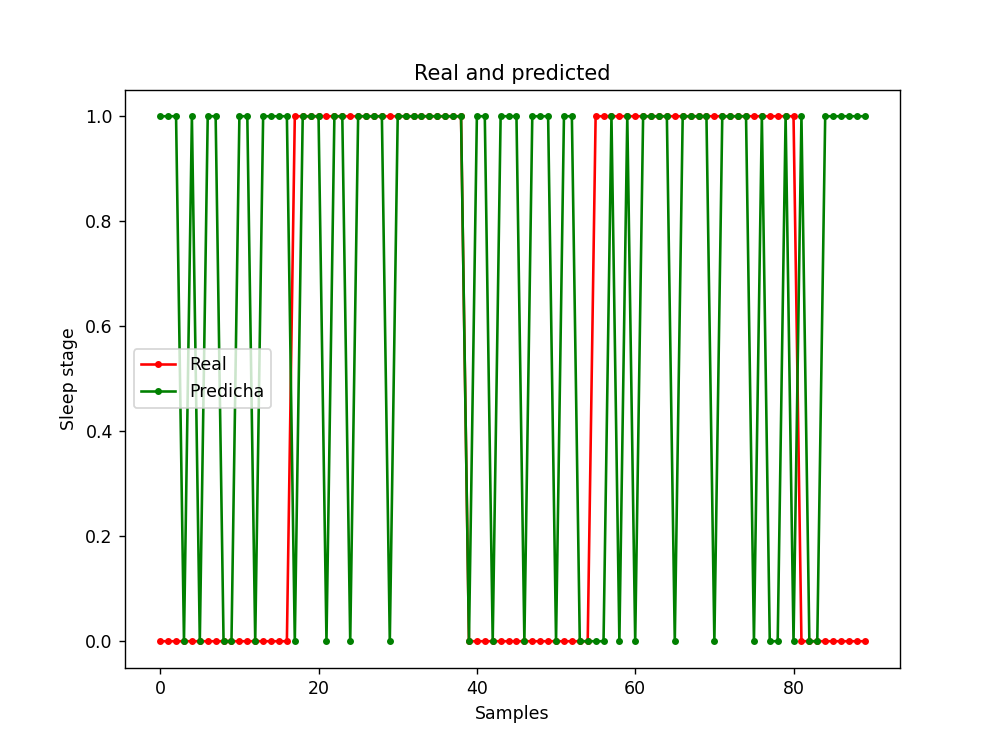

In [22]:
plt.figure(figsize=(8,6))
plt.plot(y_test_bin[0:90],color='red', marker='.',label='Real')
plt.plot(predict[0:90],color='green', marker='.',label='Predicha')

plt.title('Real and predicted')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()
plt.savefig('Image/DT.png')

<IPython.core.display.Javascript object>


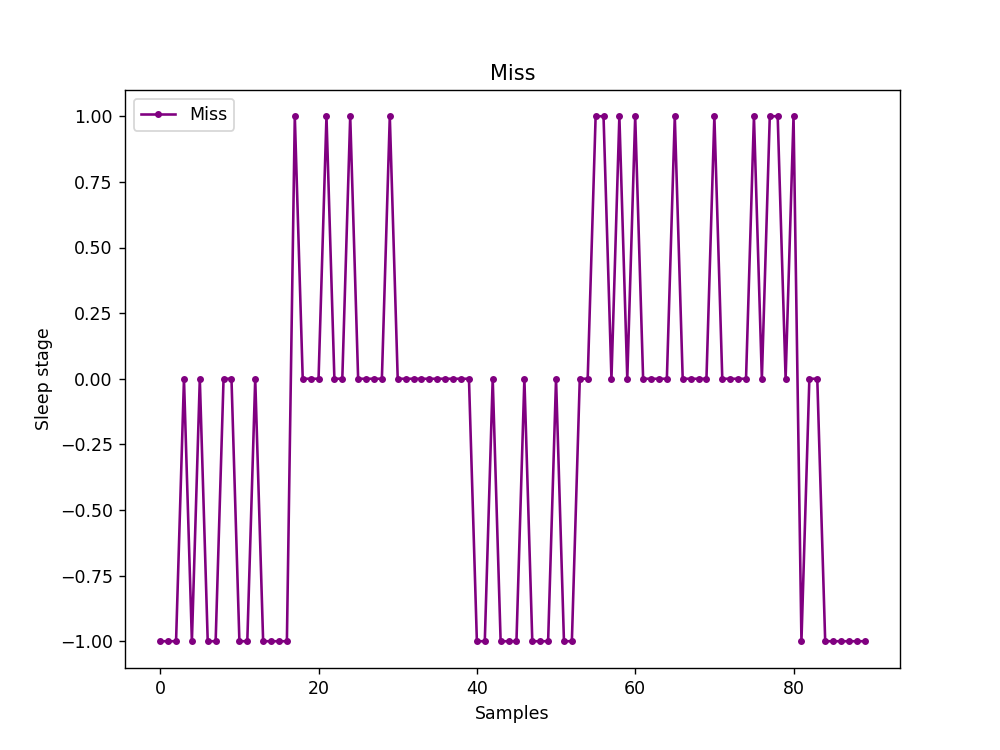

In [15]:
miss= y_test_bin - predict
plt.figure(figsize=(8,6))
plt.plot(miss[0:90],color='purple', marker='.',label='Miss')

plt.title('Miss')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()